In [4]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
    header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

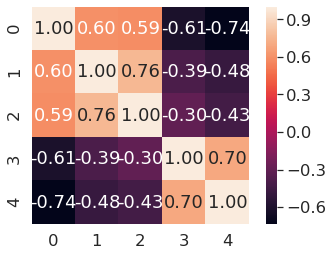

In [7]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f')

In [9]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [18]:
X = df[['RM']].values
y = df[['MEDV']].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)[:, 0]
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

130.66805963447376

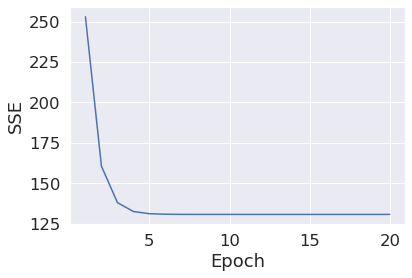

In [19]:
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [114]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

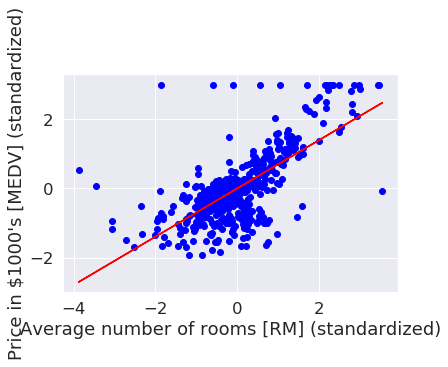

In [23]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

In [29]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: {:.3f}".format(sc_y.inverse_transform(price_std)[0]))

Price in $1000's: 10.840


In [30]:
print('Slope : {:.3f}'.format(lr.w_[1]))
print('Intercept : {:.3f}'.format(lr.w_[0]))

Slope : 0.695
Intercept : -0.000


In [38]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: {:.3f}'.format(slr.coef_[0][0]))
print('Intercept: {:.3f}'.format(slr.intercept_[0]))

Slope: 9.102
Intercept: -34.671


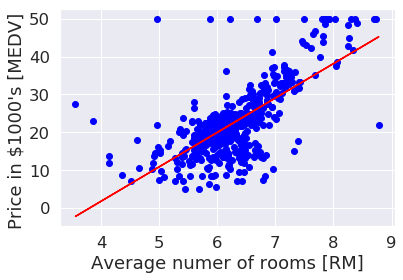

In [39]:
lin_regplot(X, y, slr)
plt.xlabel('Average numer of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV] ')
plt.show()

In [55]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss=lambda y, y_pred: np.sum(abs(y_pred - y), axis=1),
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None,
                loss=<function <lambda> at 0x7fb975364048>, max_skips=inf,
                max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

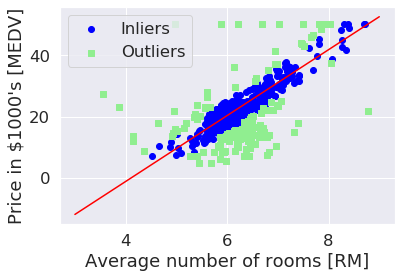

In [57]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [59]:
print('Slope: {:.3f}'.format(ransac.estimator_.coef_[0][0]))
print('Intercept: {:.3f}'.format(ransac.estimator_.intercept_[0]))

Slope: 10.735
Intercept: -44.089


In [62]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

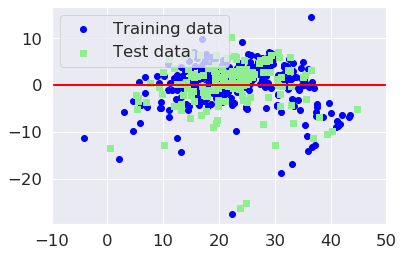

In [63]:
plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, color='lightgreen', marker='s', label='Test data')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
print('MSE train : {:.3f}, test : {:.3f}'.format(mean_squared_error(y_train, y_train_pred),
                                                 mean_squared_error(y_test, y_test_pred)))

MSE train : 19.958, test : 27.196


In [65]:
from sklearn.metrics import r2_score
print('R-2 train : {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred),
                                                r2_score(y_test, y_test_pred)))

R-2 train : 0.765, test: 0.673


In [80]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print('Ridge MSE  train : {:.3f}, test : {:.3f}'.format(mean_squared_error(y_train, y_train_pred), 
                                                  mean_squared_error(y_test, y_test_pred)))
print('Ridge R^2 train : {:.3f}, test : {:.3f}'.format(r2_score(y_train, y_train_pred),
                                                       r2_score(y_test, y_test_pred)))

Ridge MSE  train : 20.145, test : 27.762
Ridge R^2 train : 0.762, test : 0.667


In [81]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print('Lasso MSE train : {:.3f}, test : {:.3f}'.format(mean_squared_error(y_train, y_train_pred),
                                                       mean_squared_error(y_test, y_test_pred)))
print('Lasso R^2 train : {:.3f}, test : {:.3f}'.format(r2_score(y_train, y_train_pred),
                                                       r2_score(y_test, y_test_pred)))

Lasso MSE train : 24.717, test : 32.345
Lasso R^2 train : 0.708, test : 0.612


In [83]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)
y_train_pred = elasticnet.predict(X_train)
y_test_pred = elasticnet.predict(X_test)
print('Lasso MSE train : {:.3f}, test : {:.3f}'.format(mean_squared_error(y_train, y_train_pred),
                                                       mean_squared_error(y_test, y_test_pred)))
print('Lasso R^2 train : {:.3f}, test : {:.3f}'.format(r2_score(y_train, y_train_pred),
                                                       r2_score(y_test, y_test_pred)))

Lasso MSE train : 24.381, test : 31.874
Lasso R^2 train : 0.712, test : 0.617


In [96]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [90]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

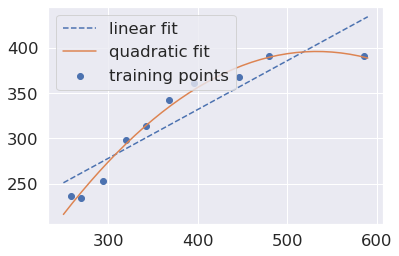

In [92]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict((quadratic.fit_transform(X_fit)))

plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [94]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear : {:.3f}, quadratid : {:.3f}'.format(
    mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear : {:.3f}, quadratic : {:.3f}'.format(
    r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training MSE linear : 569.780, quadratid : 61.330
Training R^2 linear : 0.832, quadratic : 0.982


In [99]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [101]:
X_fit = np.arange(X.min(), X.max())[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [103]:
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [104]:
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

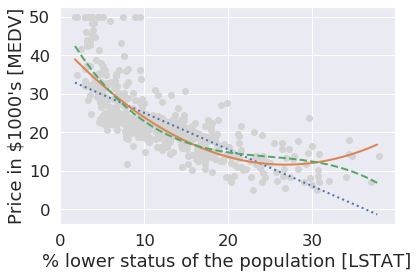

In [108]:
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1) $R^2 = {:.2f}$'.format(linear_r2), lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2) $R^2 = {:.2f}$'.format(quadratic_r2), lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3) $R^3 = {:.3f}$'.format(cubic_r2), lw=2, linestyle='--')
plt.xlabel("% lower status of the population [LSTAT]")
plt.ylabel("Price in $1000's [MEDV]")
# plt.legend(loc='upper right')
plt.show()

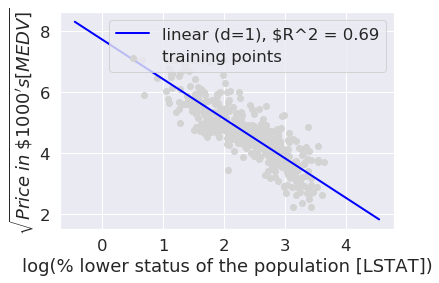

In [113]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)
# y_sqrt = y

X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2 = {:.2f}'.format(linear_r2), color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='best')
plt.show()

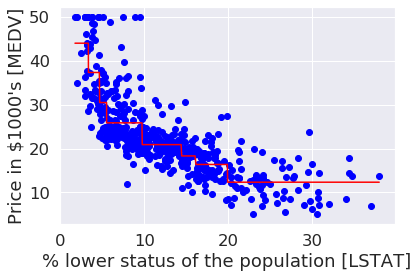

In [118]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()


In [119]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : {:.3f}, test : {:.3f}'.format(mean_squared_error(y_train, y_train_pred),
                                                mean_squared_error(y_test, y_test_pred)))
print('R^2 train : {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred),
                                                r2_score(y_test, y_test_pred)))

MSE train : 1.641, test : 11.056
R^2 train : 0.979, test: 0.878


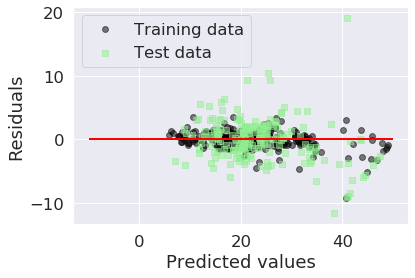

In [121]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='black', marker='o', s=35, alpha=0.5, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', s=35, alpha=0.5, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.show()